# DELE CA1 Part A Report - Convolutional Neural Network
Done By: Ang Miao Yi

___
# Background Research
___
Source: https://www.researchgate.net/publication/352846889_DCNN-Based_Vegetable_Image_Classification_Using_Transfer_Learning_A_Comparative_Study

Context: The initial experiment is done with 15 types of common vegetables that are found throughout the world. The vegetables that are chosen for the experimentation are- bean, bitter gourd, bottle gourd, brinjal, broccoli, cabbage, capsicum, carrot, cauliflower, cucumber, papaya, potato, pumpkin, radish and tomato. A total of 21000 images from 15 classes are used where each class contains 1400 images of size 224×224 and in `.jpg` format. The dataset split 70% for training, 15% for validation, and 15% for testing purpose.

Dataset: 
- Train (15000 images)
- Test (3000 images)
- Validation (3000 images)
- Each of the above folders contains subfolders for different vegetables wherein the images for respective vegetables are present

Additional Information I got from original study of the dataset: The purpose of this study is to investigate accurate vegetable image classification by utilizing convolutional neural networks (CNNs). With a dataset comprising 21,000 images across 15 classes, the study aims to assess the performance of CNNs specifically tailored for this task. Additionally, the study explores the efficacy of transfer learning by comparing the performance of custom-built CNN models with pre-trained CNN architectures like VGG16, MobileNet, InceptionV3, and ResNet. The ultimate goal is to determine which technique yields the highest accuracy and effectiveness when applied to new image datasets, particularly in the context of vegetable image classification.


### Addtional Research on CNN

1. Task and Dataset Complexity: The complexity of your classification task and the complexity of your dataset play a significant role in determining the architecture of your CNN. More complex tasks and datasets may require deeper networks with more layers and filters.

2. Model Capacity vs. Overfitting: A larger number of layers and filters increase the capacity of your model, allowing it to learn more complex patterns in the data. However, too many layers and filters can lead to overfitting, where the model memorizes the training data without generalizing well to unseen data. You'll need to strike a balance between model capacity and overfitting by monitoring performance on a validation set.

3. Convolutional Layer Parameters:
 
    - `Number of Layers`: Typically, CNNs start with a few convolutional layers followed by pooling layers to learn low-level features and progressively increase the number of layers to learn higher-level features.

    - `Number of Filters`: The number of filters determines the depth of the output volume and the number of features the network can learn. Common choices range from 16 to 512 or more, depending on the complexity of the task.

    - `Kernel Size`: Smaller kernel sizes (e.g., 3x3) capture finer details and are common choices in CNN architectures. Larger kernel sizes (e.g., 5x5 or 7x7) capture broader features but may increase computational cost.

4. Model Complexity and Training Time: Deeper networks with more layers and filters require more computational resources and longer training times. Consider the available resources (e.g., GPU, memory) and time constraints when designing your model architecture.

5. Experimentation and Evaluation: Finally, experimentation and evaluation on a validation set are crucial for determining the optimal architecture. Try different configurations, monitor performance metrics (e.g., accuracy, loss) on the validation set, and choose the architecture that achieves the best performance.

___
# Import Modules
___

In [1]:
# Basic Libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from PIL import Image

# TensorFlow and Keras Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier # Import sklearn wrapper from keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

# Other Libraries
from sklearn.model_selection import RandomizedSearchCV # Import RandomizedSearchCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix

# Set seaborn style
sns.set(style='darkgrid')

In [2]:
# Fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# Instantiate an EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.h5', save_best_only=True)
res37_best_tuned_model =  ModelCheckpoint('res37_best_tuned_model.h5', save_best_only=True)
res131_best_tuned_model =  ModelCheckpoint('res131_best_tuned_model.h5', save_best_only=True)

___
# Import Dataset & Setup
___

In [3]:
# Choose your input image size
pixel_37 = 37

# Load the training data, set the image size and ensure we load all images in one batch - Set very large batch size
res37_train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset For Part A/Train',
                                                                    color_mode='grayscale', 
                                                                    image_size=(pixel_37, pixel_37), 
                                                                    batch_size=1000000)
# Load the test data
res37_test_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset For Part A/test',
                                                                    color_mode='grayscale', 
                                                                    image_size=(pixel_37, pixel_37), 
                                                                    batch_size=1000000)
# Load the validation data
res37_validation_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset For Part A/validation',
                                                                    color_mode='grayscale', 
                                                                    image_size=(pixel_37, pixel_37), 
                                                                    batch_size=1000000)
# Getting the class names of the training data
print(f"\nClass names of data: {res37_train_data.class_names}\n")

Found 9043 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.

Class names of data: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']



In [4]:
# Getting the shape of X_train and y_train
for X, y in res37_train_data:
    X_train = X
    y_train = y
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")

# Getting the shape of X_test and y_test
for X, y in res37_test_data:
    X_test = X
    y_test = y
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}\n")

# Getting the shape of X_val and y_val
for X, y in res37_validation_data:
    X_val = X
    y_val = y
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (9043, 37, 37, 1)
Shape of y_train: (9043,)

Shape of X_test: (3000, 37, 37, 1)
Shape of y_test: (3000,)

Shape of X_val: (3000, 37, 37, 1)
Shape of y_val: (3000,)


From the above cell, we can see that the shape of X_train, X_test and X_val are shape (37, 37, 1), where (37, 37) is the size of image and (1) is the color channel (no color). The 9043 and 3000 are the number of the images in each variable respectively.

___
# Exploratory Data Analysis (EDA)
___

### EDA - Visualizing Sample Images from Training Data

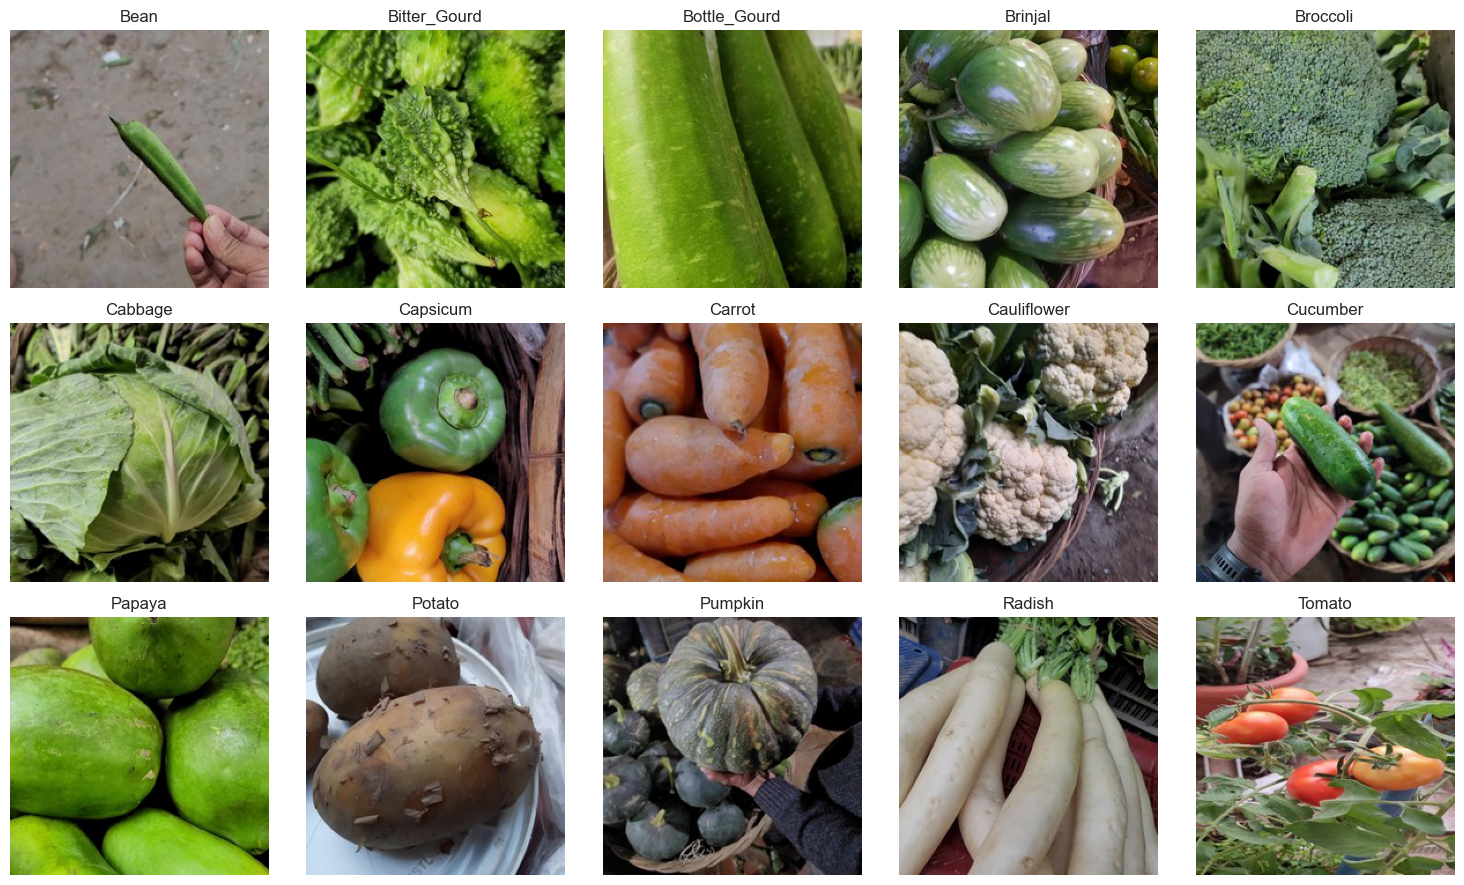

In [5]:
class_names = res37_train_data.class_names
train_dataset_path = './Dataset For Part A/Train'

# Set up the plot (3x5 grid for 15 images)
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dataset_path, class_name)
    images = os.listdir(class_path)
    random_image = random.choice(images)
    img_path = os.path.join(class_path, random_image)

    # Load the image
    img = Image.open(img_path)

    # Plot the image
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

From the cell above, I printed out the sample images from the 15 different classes. We can see that the majority of the vegetable colors are green and red, and sometimes white. This means that the model might heavily rely on these color features for classification. However, this could also introduce a bias if different classes share similar colors, potentially leading to misclassification. For instance, green vegetables like Bean and Bottle Gourd might be confused with each other, or red vegetables like tomatoes and carrots/capsicum might be mistaken for one another.

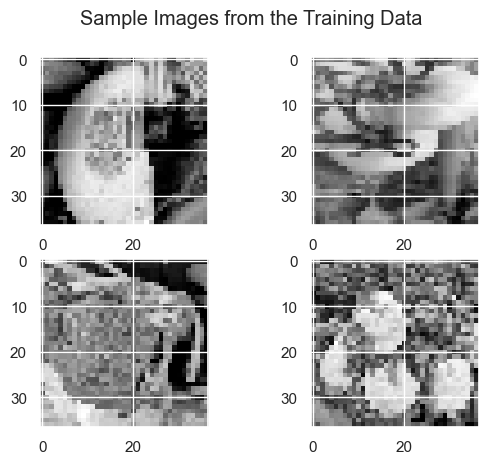

In [6]:
# Plot vegetables instances
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# Show the plot
plt.suptitle('Sample Images from the Training Data')
plt.show()

In this section, we will plot sample images from the training dataset. Specifically, we will display 4 images in grayscale to give us a visual understanding of the data, with a pixel size of 37x37

### EDA - Class Distribution

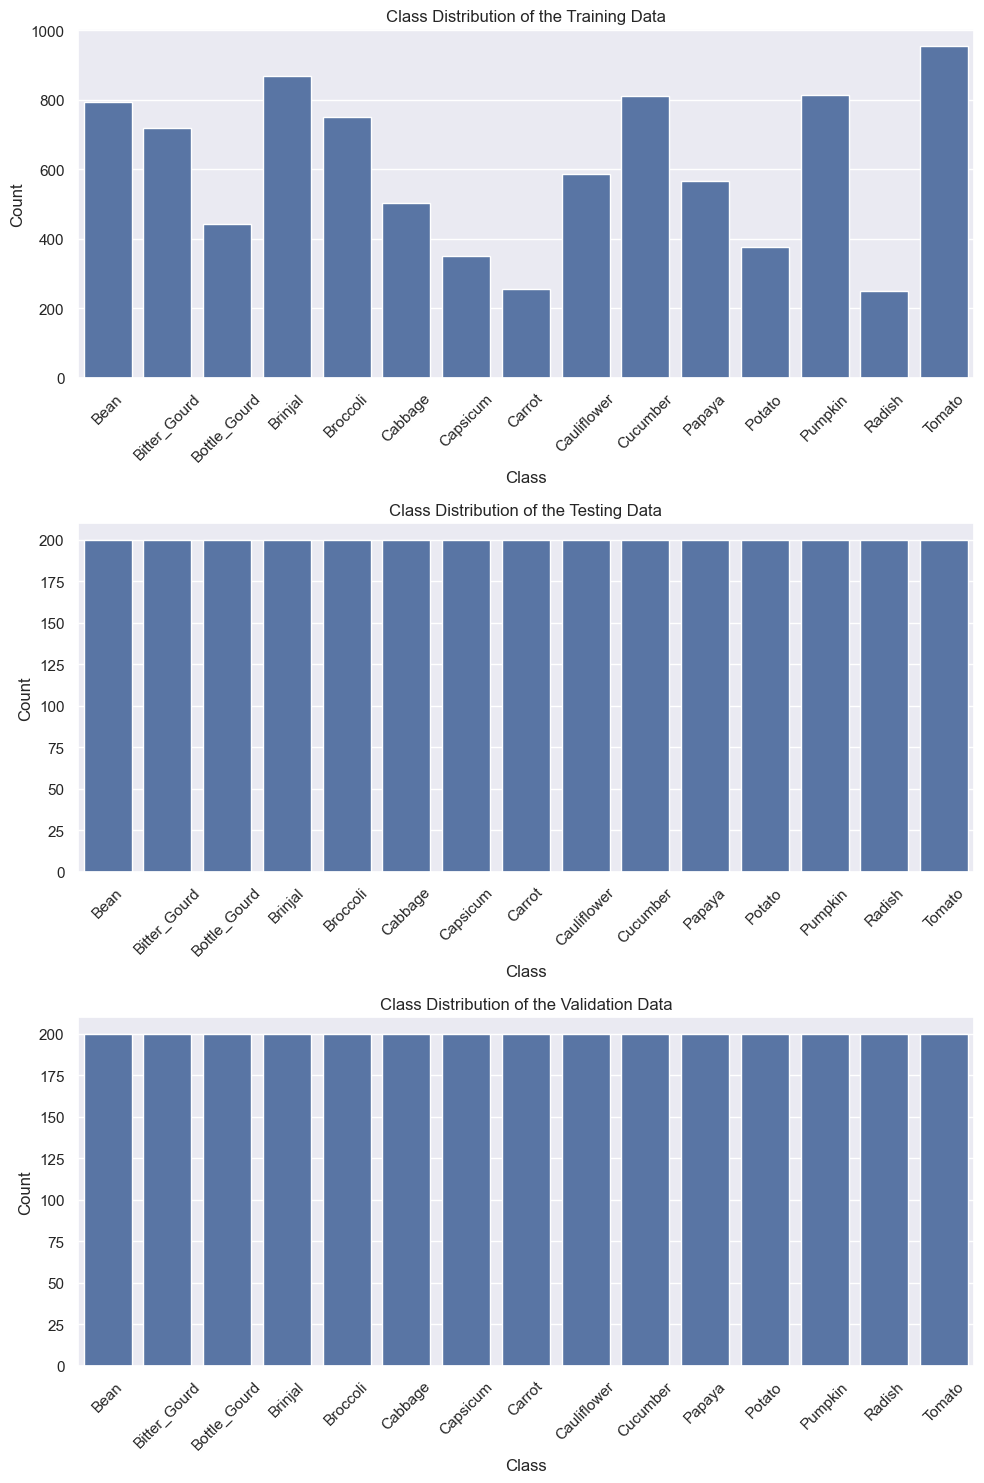

In [7]:
# Class Distribution: Visualize the distribution of classes using bar plots
# Get the counts for each class
train_data_counts = np.unique(y_train, return_counts=True)[1]
# Get the class names
train_data_class_names = res37_train_data.class_names
# Create a dictionary of the labels and the counts
train_label_count_dict = dict(zip(train_data_class_names, train_data_counts))


# Class Distribution: Visualize the distribution of classes using bar plots
# Get the counts for each class
test_data_counts = np.unique(y_test, return_counts=True)[1]
# Get the class names
test_data_class_names = res37_test_data.class_names
# Create a dictionary of the labels and the counts
test_label_count_dict = dict(zip(test_data_class_names, test_data_counts))


# Class Distribution: Visualize the distribution of classes using bar plots
# Get the counts for each class
val_data_counts = np.unique(y_val, return_counts=True)[1]
# Get the class names
val_data_class_names = res37_validation_data.class_names
# Create a dictionary of the labels and the counts
validation_label_count_dict = dict(zip(val_data_class_names, val_data_counts))

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
# Training Data
sns.barplot(ax=axes[0], x=list(train_label_count_dict.keys()), y=list(train_label_count_dict.values()))
axes[0].set_title('Class Distribution of the Training Data')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Testing Data
sns.barplot(ax=axes[1], x=list(test_label_count_dict.keys()), y=list(test_label_count_dict.values()))
axes[1].set_title('Class Distribution of the Testing Data')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Validation Data
sns.barplot(ax=axes[2], x=list(validation_label_count_dict.keys()), y=list(validation_label_count_dict.values()))
axes[2].set_title('Class Distribution of the Validation Data')
axes[2].set_xlabel('Class')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

From the cell above, we will visualize the distribution of classes in the training, testing, and validation datasets using bar plots. This will help us understand the balance of the dataset across different splits and identify any potential imbalances that could affect model performance. Looking at the class distribution of the training data, we can say that there is an imbalance of number of images across the 15 different classes. 

Here are some potential reason as to how it will impact our model:
1. `Biased Model`: A model trained on imbalanced data tends to become biased towards the majority classes. This means it might predict the majority class more often, ignoring or underestimating the minority classes. As a result, the model's accuracy might appear high, but it will fail to perform well on the minority classes. E.g. More `Tomato` images mean that the model have more training on the `Tomato` class itself, while other classes with lesser training data such as `Carrot` and `Radish` is at a disadvantage because the model does not learn equally as much as compared to `Tomato`.

2. `Poor Generalization`: Models trained on imbalanced data often fail to generalize well to new, unseen data. They learn to prioritize the patterns of the majority class, missing important patterns in the minority classes, leading to poor performance when encountering diverse datasets in real-world scenarios.

3. `Learning Difficulty`: Neural networks and other machine learning models require a sufficient number of examples from each class to learn distinguishing features effectively. If some classes have too few examples, the model might not learn these features well, resulting in poor performance for those classes.


___
# Create & Evaluate Baseline CNN Model
___
Source: https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7

Guideline: 
1. Always start by using smaller filters is to collect as much local information as possible, and then gradually increase the filter width to reduce the generated feature space width to represent more global, high-level and representative information
2. Following the principle, the number of channels should be low in the beginning such that it detects low-level features which are combined to form many complex shapes(by increasing the number of channels) which help distinguish between classe

3. General filter sizes used are 3x3, 5x5 and 7x7 for the convolutional layer for a moderate or small-sized images and for Max-Pooling parameters we use 2x2 or 3x3 filter sizes with a stride of 2

In [8]:
# Normalize the data from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
num_classes = y_test.shape[1]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 35, 35, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 17, 17, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

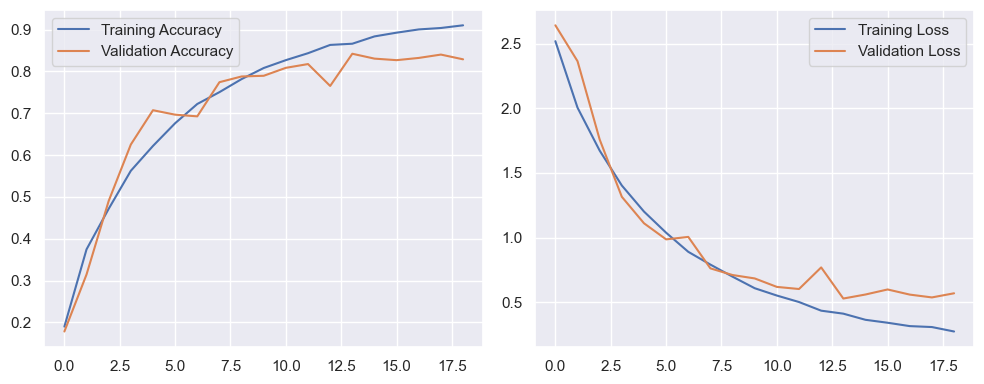

CNN Accuracy: 84.83%
CNN Error: 15.17%


In [9]:
# fix random seed for reproducibility
np.random.seed(88)

# Create a Sequential model
base_CNN_model = Sequential()

# Add a Convolutional layer
base_CNN_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(37, 37, 1)))
base_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
base_CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
base_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
base_CNN_model.add(Flatten())

# Add a fully connected Dense layer
base_CNN_model.add(Dense(units=128, activation='relu'))
base_CNN_model.add(Dropout(rate=0.5))
base_CNN_model.add(BatchNormalization())
base_CNN_model.add(Dense(units=15, activation='softmax'))

# Compile the model
base_CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
base_CNN_model.summary()

# Fit Model
history = base_CNN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, batch_size=64, callbacks=early_stopping)

# Evaluate Model
base_CNN_model.evaluate(X_test, y_test, verbose=0)

# Plot the accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].legend()
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend()
fig.suptitle('Training and Validation for Baseline CNN Model (37x37)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = base_CNN_model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the above cell, I have created a baseline CNN model using the guideline I have stated above. From the output, we can see that the training and validation accuracy is quite high, with values of `92% and 85% `respectively (Values might differ a bit). Furthermore, we can notice from the line graph of the loss, that it has improved by decreasing close to zero, with values of 0.2% for Training Loss and 0.5% for Validation Loss. Lastly, by using `.evaluate()` on our `X_test` and `y_test` data, we get a `CNN accuracy of 84%`, and `CNN error of 15%`, which is decent for a baseline model. In general, it seems that our baseline CNN is doing quite well with the dataset. However, we need to tackle the overfitting issue we have here, as seen from the graph which shows differences between Training and Validation Accuracy, and Training and Validation Loss towards the end of the epochs. We will solve this later either by hyperparameter tuning, optimizing class weights or data augmentation. 

### Confusion Matrix Heatmap

1/1 [==============================] - 0s 17ms/step


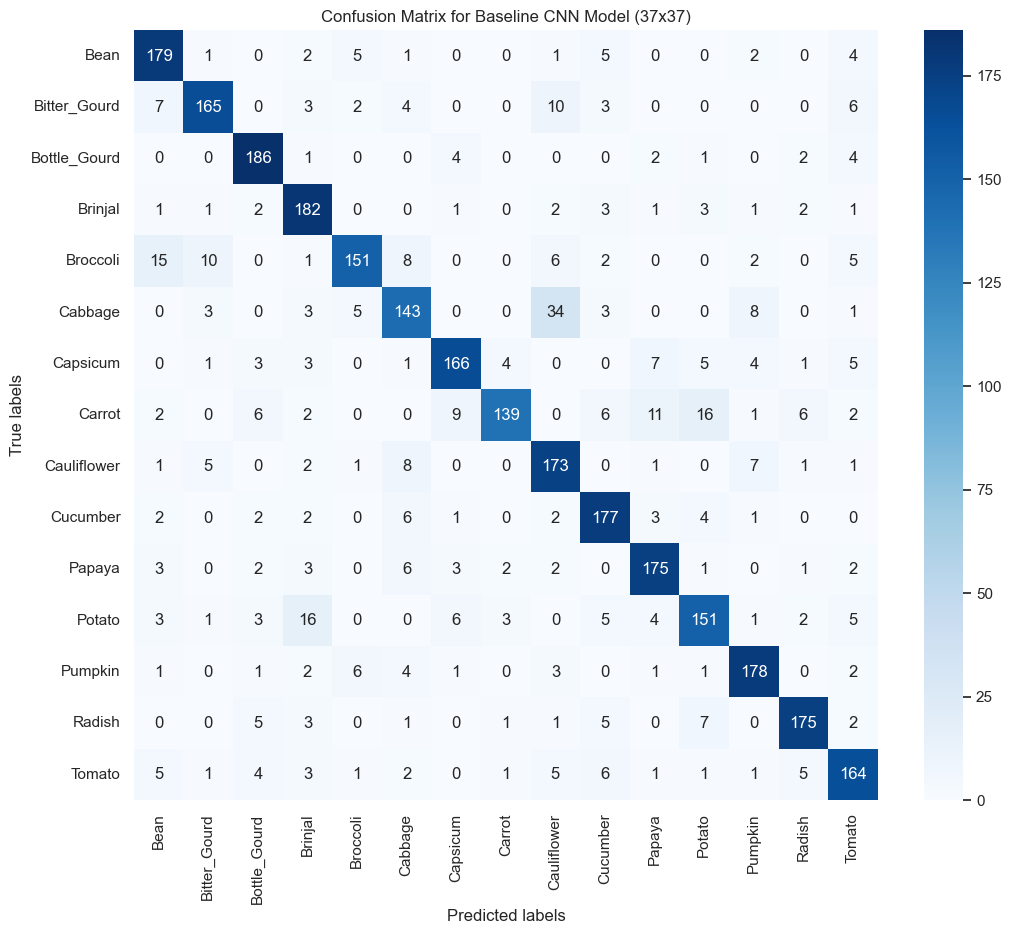

In [10]:
# Path to the test dataset directory
test_dir = './Dataset For Part A/test/'

# Get all subdirectories (which are the class labels)
actual_labels = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])

# Collect all test image paths and their corresponding labels
test_image_paths = []
true_labels = []

for label in actual_labels:
    folder_path = os.path.join(test_dir, label)
    for img_name in os.listdir(folder_path):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Add other image formats if needed
            test_image_paths.append(os.path.join(folder_path, img_name))
            true_labels.append(label)

# Assuming 'model' is already loaded and 'class_map' is defined
class_map = {i: label for i, label in enumerate(actual_labels)}  # Create class_map

# Generate predictions for each test image
predicted_labels = []

for image_path in test_image_paths:
    # Load and preprocess the image
    test_img_37 = load_img(image_path, target_size=(37, 37), color_mode='grayscale')
    test_img_arr_37 = img_to_array(test_img_37) / 255.0  # Normalize
    test_img_input_37 = np.expand_dims(test_img_arr_37, axis=0) 

    # Generate the prediction
    prediction = base_CNN_model.predict(test_img_input_37)
    predicted_label_index = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    predicted_labels.append(class_map[predicted_label_index])

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=actual_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Baseline CNN Model (37x37)')
plt.show()

From the cell above, it loads a test dataset, generates predictions using a pre-trained CNN model, computes a confusion matrix comparing true and predicted labels, and plots the matrix as a heatmap using Seaborn and Matplotlib. This visualization helps assess the model's classification performance.

Insights gained: 
- Great general performance by the base CNN Model
- Diagonal Blue Squares shows the number of times the model has predicted the correct class for the image, and we can see that the intensity of the blue is high, meaning that there are high number of correctly predicted images
- Some images are predicted incorrectly, where 14 cabbage images are wrongly predicted as Cauliflower, which might be due to presence of whites in cabbage which led to this prediction.

___
# Model Improvement - Class Weights
___

### Generating Class Weights

In [11]:
def generate_class_weights(class_series, multi_class=True, one_hot_encoded=False): 
  if multi_class:
    if one_hot_encoded:
      class_series = np.argmax(class_series, axis=1)
  
    class_labels = np.unique(class_series)
    class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=class_series)
    return dict(zip(class_labels, class_weights))
  else:
    mlb = None
    if not one_hot_encoded:
      mlb = MultiLabelBinarizer()
      class_series = mlb.fit_transform(class_series)

    n_samples = len(class_series)
    n_classes = len(class_series[0])

    class_count = [0] * n_classes
    for classes in class_series:
        for index in range(n_classes):
            if classes[index] != 0:
                class_count[index] += 1
    
    class_weights = [n_samples / (n_classes * freq) if freq > 0 else 1 for freq in class_count]
    class_labels = range(len(class_weights)) if mlb is None else mlb.classes_
    return dict(zip(class_labels, class_weights))
  
labels = np.array([label.numpy() for _, label in res37_train_data.unbatch()])
class_weights = generate_class_weights(labels)

print(class_weights)

{0: 0.7583228511530399, 1: 0.8373148148148148, 2: 1.3670445956160242, 3: 0.6945468509984639, 4: 0.8038222222222222, 5: 1.1985420808482439, 6: 1.7175688509021843, 7: 2.3549479166666667, 8: 1.027030096536059, 9: 0.7424466338259442, 10: 1.0651354534746762, 11: 1.5991158267020336, 12: 0.7406224406224406, 13: 2.430913978494624, 14: 0.6312739965095986}


For first model improvement, I generated class weights for each class due to the differences in the number of image in each class which may led to poor model performance and model bias. Hence, by generating class weights, we ensure that each class are fitted to the model with equal contribution to the model's training process, leading to better overall performance.

### Retrain Model with the Class Weights & Evaluate

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 35, 35, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

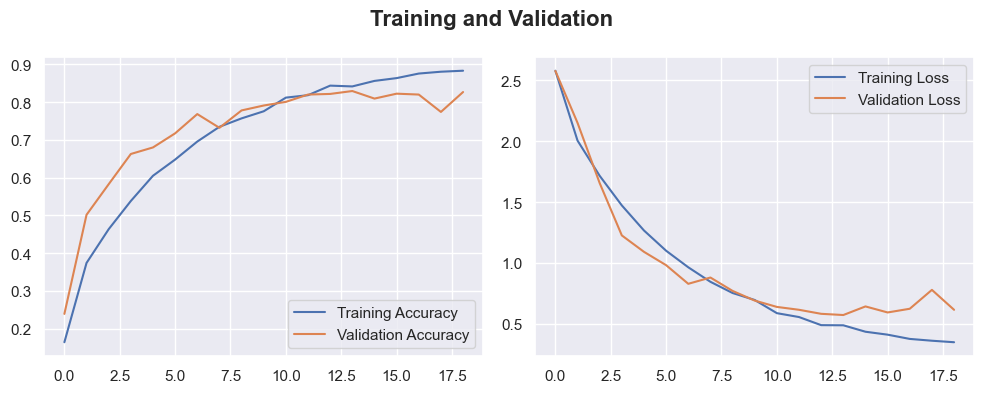

CNN Accuracy: 82.37%
CNN Error: 17.63%


In [12]:
# Create a Sequential model
CNN_model_class_weights = Sequential()

CNN_model_class_weights.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(37, 37, 1)))
CNN_model_class_weights.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model_class_weights.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
CNN_model_class_weights.add(MaxPooling2D(pool_size=(2, 2)))
CNN_model_class_weights.add(Flatten())
CNN_model_class_weights.add(Dense(units=128, activation='relu'))
CNN_model_class_weights.add(Dropout(rate=0.5))
CNN_model_class_weights.add(BatchNormalization())
CNN_model_class_weights.add(Dense(units=15, activation='softmax'))

# Compile the model
CNN_model_class_weights.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
CNN_model_class_weights.summary()

# Fit Model
history = CNN_model_class_weights.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, batch_size=64, class_weight = class_weights, callbacks=[early_stopping, res37_best_tuned_model])

# Evaluate Model
CNN_model_class_weights.evaluate(X_test, y_test, verbose=0)

# Plot the accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].legend()
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend()
fig.suptitle('Training and Validation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = CNN_model_class_weights.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the above cell, I used the generated class weights of the classes to retrain the CNN model again, to see if there is any improvement after using the class weights. From the accuracy line plot, we can see that the model seem to drop its training and validation accuracy, at 89% and 81% respectively. Using the `.evaluate()` and the X_test and y_test, we see that the CNN accuracy is 84.5% and the CNN error is 15.47%. This means that after using the class weights, the model's accuracy has decreased slightly. However, it seems that the overfitting has improved a bit too, with the difference(gap) between the training and validation accuracy has decreased a bit, similarly to training and validation loss too. In conclusion, it seems that despite the slight drop in model accuracy, the overfitting of the model did improve. Next cell, we will use hyperparameter tuning to see if the model can improve more in terms of the accuracy.

### Confusion Matrix heatmap

1/1 [==============================] - 0s 16ms/step


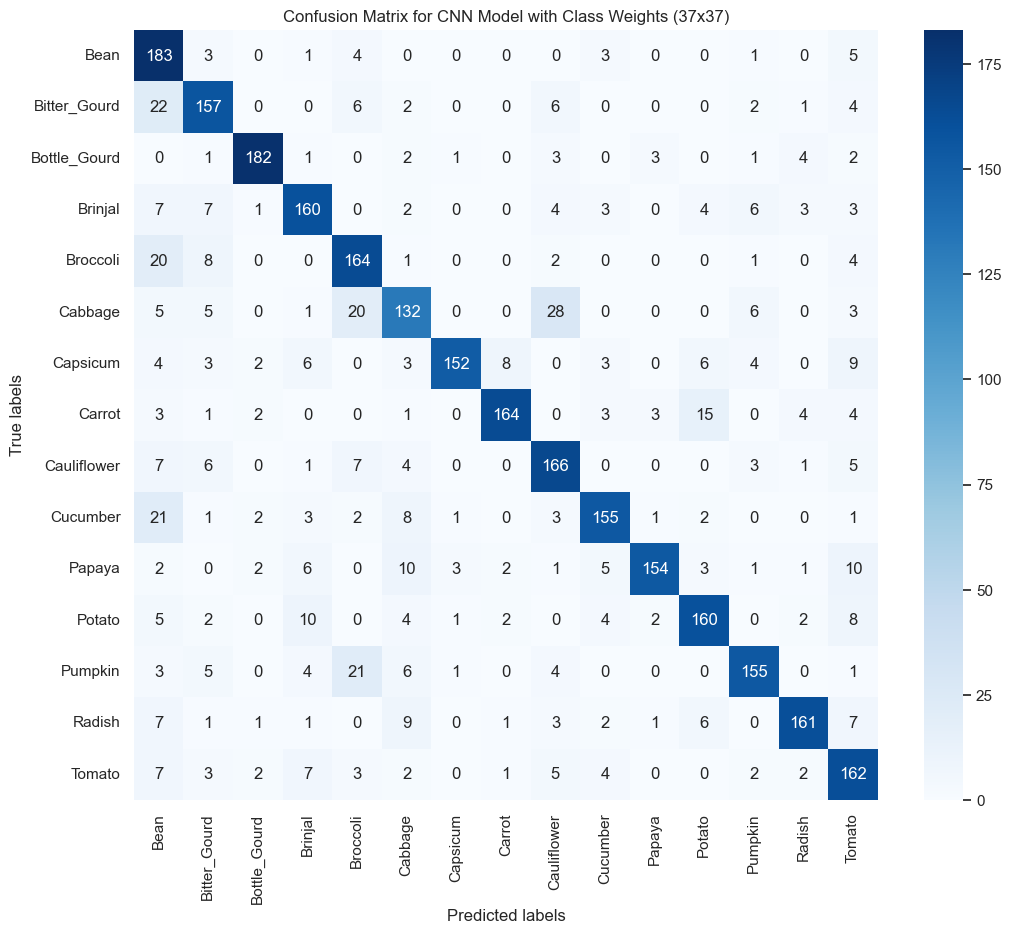

In [13]:
# Path to the test dataset directory
test_dir = './Dataset For Part A/test/'

# Get all subdirectories (which are the class labels)
actual_labels = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])

# Collect all test image paths and their corresponding labels
test_image_paths = []
true_labels = []

for label in actual_labels:
    folder_path = os.path.join(test_dir, label)
    for img_name in os.listdir(folder_path):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Add other image formats if needed
            test_image_paths.append(os.path.join(folder_path, img_name))
            true_labels.append(label)

# Assuming 'model' is already loaded and 'class_map' is defined
class_map = {i: label for i, label in enumerate(actual_labels)}  # Create class_map

# Generate predictions for each test image
predicted_labels = []

for image_path in test_image_paths:
    # Load and preprocess the image
    test_img_37 = load_img(image_path, target_size=(37, 37), color_mode='grayscale')
    test_img_arr_37 = img_to_array(test_img_37) / 255.0  # Normalize
    test_img_input_37 = np.expand_dims(test_img_arr_37, axis=0) 

    # Generate the prediction
    prediction = CNN_model_class_weights.predict(test_img_input_37)
    predicted_label_index = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    predicted_labels.append(class_map[predicted_label_index])

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=actual_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for CNN Model with Class Weights (37x37)')
plt.show()

From the cell above, it loads a test dataset, generates predictions using a pre-trained CNN model, computes a confusion matrix comparing true and predicted labels, and plots the matrix as a heatmap using Seaborn and Matplotlib. This visualization helps assess the model's classification performance.

___
# Model Improvement - Hyperparameter Tuning
___

### Turn a Keras model into a Sklearn estimator

In [14]:
# Ensure X_train and y_train are numpy arrays
X_train_2D = np.asarray(X_train)
y_train_2D = np.asarray(y_train)

# Function that creates our Keras model
def create_model(activation='relu', learning_rate=0.01, optimizer='adam'):
    # Create an optimizer with the given learning rate
    if optimizer == 'adam':
        optimizer_lr = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        optimizer_lr = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer_lr = optimizer  # default case for custom optimizer if needed
    
    # Create a Sequential model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(37, 37, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation=activation))
    model.add(Dropout(rate=0.5))
    model.add(BatchNormalization())
    model.add(Dense(units=15, activation='softmax'))
    model.compile(optimizer=optimizer_lr, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create a model as a sklearn estimator
model = KerasClassifier(build_fn=create_model)

C:\Users\angmi\AppData\Local\Temp\ipykernel_18448\3977955085.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


The shapes of our `X_train` and `y_train` suggest that our data is likely for image classification. Specifically, `X_train` has a shape of `(9043, 37, 37, 1)`, indicating 9043 grayscale images of size 37x37. However, the `KerasClassifier` expects 2D input arrays (i.e., `(n_samples, n_features)`), which is typically used for tabular data rather than image data.

To properly handle this situation, I adjusted the input shape handling in my Keras model creation function to accommodate 4D input arrays (i.e., `(n_samples, height, width, channels)`).

### Random search on Keras models - Optimizer, Epochs, Batch_Size, Activation

In [15]:
# Define a series of parameters for RandomizedSearchCV
params = {
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64, 128],
    'epochs': [20, 30, 50],
    'optimizer': ['sgd', 'adam'],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a random search cv object and fit it to the data
random_search = RandomizedSearchCV(model, param_distributions=params, cv=3)
random_search_results = random_search.fit(X_train_2D, y_train_2D)

# Print results
print(random_search_results.best_score_, random_search_results.best_params_)

Epoch 1/50
48/48 [==============================] - 1s 11ms/step - loss: 2.7110 - accuracy: 0.1136
Epoch 2/50
48/48 [==============================] - 0s 8ms/step - loss: 2.5769 - accuracy: 0.1402
Epoch 3/50
48/48 [==============================] - 0s 8ms/step - loss: 2.4127 - accuracy: 0.2198
Epoch 4/50
48/48 [==============================] - 0s 9ms/step - loss: 2.3034 - accuracy: 0.2558
Epoch 5/50
48/48 [==============================] - 0s 9ms/step - loss: 2.1506 - accuracy: 0.3026
Epoch 6/50
48/48 [==============================] - 0s 8ms/step - loss: 2.0443 - accuracy: 0.3454
Epoch 7/50
48/48 [==============================] - 0s 8ms/step - loss: 1.9870 - accuracy: 0.3573
Epoch 8/50
48/48 [==============================] - 0s 9ms/step - loss: 1.8783 - accuracy: 0.3955
Epoch 9/50
48/48 [==============================] - 0s 9ms/step - loss: 1.7759 - accuracy: 0.4365
Epoch 10/50
48/48 [==============================] - 0s 8ms/step - loss: 1.7182 - accuracy: 0.4477
Epoch 11/50
48/48 

From the two cell above, I converted the keras model into sklearn estimators using `KerasClassifier` so that we can perform hyperparameter search by using methods like RandomizedSearchCV. After that, I finish by simply instantiating a KerasClassifier object passing create_model as the building function, other parameters like epochs and batch_size are optional but should be passed if we want to specify them. Then, I defined the `params` which stores the parameters for RandomizedSearchCV to find. Then I add my model i defined earlier on and parameters are being searched. 

Results I got: After running the RandomizedSearchCV, I got my best params to be `{'optimizer': 'sgd', 'learning_rate': 0.01, 'epochs': 50, 'batch_size': 16, 'activation': 'relu'}`. Next, I will retrain my CNN model with these parameters I got and evaluate the model.

### Retrain CNN Model with Optimal Parameters from RandomizedSearchCV & Evaluate

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 35, 35, 32)        320       
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_33 (Flatten)        (None, 3136)              0         
                                                                 
 dense_66 (Dense)            (None, 128)             

c:\Users\angmi\anaconda3\envs\gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


566/566 [==============================] - 3s 4ms/step - loss: 2.6597 - accuracy: 0.1204 - val_loss: 2.6657 - val_accuracy: 0.0927
Epoch 2/50
566/566 [==============================] - 2s 4ms/step - loss: 2.3686 - accuracy: 0.2108 - val_loss: 2.1209 - val_accuracy: 0.3370
Epoch 3/50
566/566 [==============================] - 2s 4ms/step - loss: 2.1499 - accuracy: 0.2913 - val_loss: 2.3112 - val_accuracy: 0.2767
Epoch 4/50
566/566 [==============================] - 2s 4ms/step - loss: 2.0100 - accuracy: 0.3497 - val_loss: 1.9349 - val_accuracy: 0.4113
Epoch 5/50
566/566 [==============================] - 2s 4ms/step - loss: 1.8472 - accuracy: 0.4099 - val_loss: 1.9766 - val_accuracy: 0.3100
Epoch 6/50
566/566 [==============================] - 2s 4ms/step - loss: 1.7531 - accuracy: 0.4317 - val_loss: 3.4791 - val_accuracy: 0.1780
Epoch 7/50
566/566 [==============================] - 2s 4ms/step - loss: 1.6509 - accuracy: 0.4667 - val_loss: 1.5250 - val_accuracy: 0.5147
Epoch 8/50
566/56

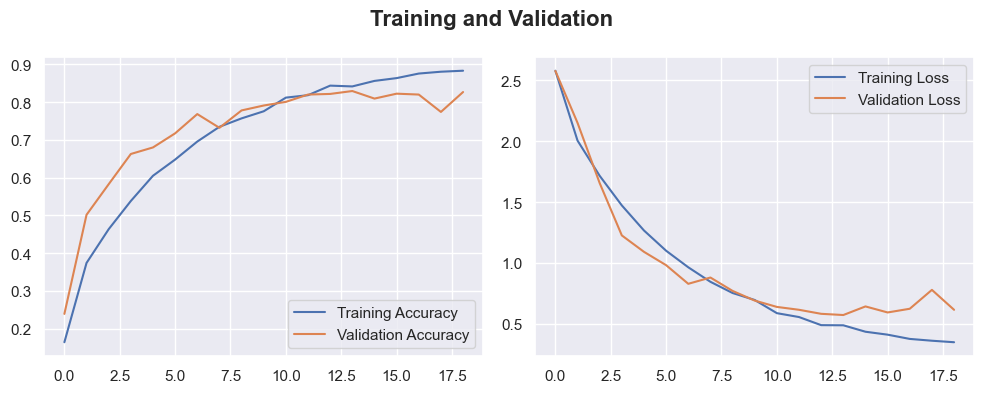

CNN Accuracy: 71.63%
CNN Error: 28.37%


In [16]:
# Create a Sequential model
tuned_CNN_model = Sequential()

tuned_CNN_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(37, 37, 1)))
tuned_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
tuned_CNN_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
tuned_CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
tuned_CNN_model.add(Flatten())
tuned_CNN_model.add(Dense(units=128, activation='relu'))
tuned_CNN_model.add(Dropout(rate=0.5))
tuned_CNN_model.add(BatchNormalization())
tuned_CNN_model.add(Dense(units=15, activation='softmax'))

# Compile the model
tuned_CNN_model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
tuned_CNN_model.summary()

# Fit Model
history_tuned_CNN_model = tuned_CNN_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, batch_size=16, class_weight = class_weights, callbacks=[early_stopping])

# Evaluate Model
tuned_CNN_model.evaluate(X_test, y_test, verbose=0)

# Plot the accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].legend()
ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].legend()
fig.suptitle('Training and Validation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = tuned_CNN_model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the cell above, I ran the CNN model again with the parameters I got from the RandomizedSearchCV. The results show that the CNN accuracy and error has worsen, with accuracy decreasing to 76% and error increasing to 23%. 

___
# Model Improvement - Data Augmentation
___

Found 9043 images belonging to 15 classes.
Epoch 1/30
566/566 [==============================] - 22s 39ms/step - loss: 2.1205 - accuracy: 0.3181 - val_loss: 1.1902 - val_accuracy: 0.6150
Epoch 2/30
566/566 [==============================] - 10s 18ms/step - loss: 2.0039 - accuracy: 0.3518 - val_loss: 3.3001 - val_accuracy: 0.2427
Epoch 3/30
566/566 [==============================] - 10s 18ms/step - loss: 1.9322 - accuracy: 0.3677 - val_loss: 1.8265 - val_accuracy: 0.4323
Epoch 4/30
566/566 [==============================] - 11s 19ms/step - loss: 1.8782 - accuracy: 0.3814 - val_loss: 1.9114 - val_accuracy: 0.4373
CNN Model Accuracy: 62.70%


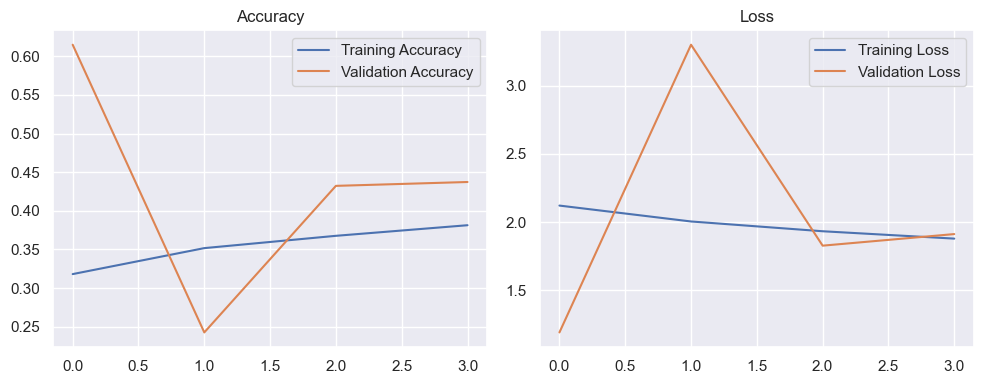

CNN Accuracy: 62.70%
CNN Error: 37.30%


In [17]:
# Define a smaller batch size
batch_size = 16

# Adjust the batch size for the data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    directory='./Dataset For Part A/Train',
    target_size=(37, 37),  # Resize images to a smaller resolution if needed
    batch_size=batch_size,   # Use a smaller batch size
    class_mode='categorical',
    color_mode='grayscale')

# Apply normalization and augmentation on-the-fly
train_augmented_data_37 = train_generator

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
history = tuned_CNN_model.fit(train_augmented_data_37, validation_data=(X_val, y_val), 
                           epochs=30, verbose=1, callbacks=[early_stopping])

# Final evaluation of the model
scores = tuned_CNN_model.evaluate(X_test, y_test, verbose=0)
print("CNN Model Accuracy: {:.2f}%".format(scores[1]*100))

# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

fig.suptitle('Training and Validation for CNN Model (37x37)(Data Augmentation)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = tuned_CNN_model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the above cell output, we can see that the CNN Model Accuracy has dropped drastically to about 62%, and have a high CNN Error of about 38%. This means that doing data augmentation on the 37 by 37 image data is bad in improving the CNN model. Therfore, we can conclude that data augmentation on 37 by 37 data is not beneficial as it does not improve the model in any way.

Some reasons might be due to:
1. `Loss of Information`:
    - When you apply transformations like rotation, scaling, or cropping to a small image, you risk losing crucial information. For instance, if you rotate a 37 by 37 image by a significant angle, parts of the image may get cropped out, leading to loss of important features.
3. `Limited Variation`:
    - With small images, there's only so much variation you can introduce through data augmentation before the images become unrecognizable or lose their semantic meaning. For example, flipping or rotating a 37 by 37 image might not change its appearance significantly, limiting the effectiveness of augmentation.
5. `Resolution Constraints`:
    - Small images inherently have limited resolution, which can affect the quality of the augmented images. For instance, when you scale up a 37 by 37 image, the resulting image may appear pixelated or blurry, making it difficult for the model to learn from. Conducting data augmentation may make it worse.

Play with batch sizes, activations, optimizers and learning rates

___
# Final Best CNN Model - 37 by 37 pixel
___
In conclusion, the best model is the CNN Model with Class Weights, as it has a high accuracy and low overfitting. Saving the best tuned model weights for 37 by 37 pixel

In [18]:
# Load the model
res37_best_tuned_model = load_model('res37_best_tuned_model.h5')
print("Loaded res37_best_tuned_model successfully")

# Save the model weights
res37_best_tuned_model.save_weights('res37_best_tuned_model_weights.h5')
print("Saved res37_best_tuned_model weights successfully")

Loaded res37_best_tuned_model successfully
Saved res37_best_tuned_model weights successfully


___
# Import Dataset & Setup - 131 by 131 pixels
___

In [19]:
# Choose your input image size
pixel = 131

# Load the training data, set the image size and ensure we load all images in one batch - Set very large batch size
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset For Part A/Train',
                                                                 color_mode='grayscale', 
                                                                 image_size=(pixel, pixel), 
                                                                 batch_size=1000000)

# Load the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset For Part A/test',
                                                                color_mode='grayscale', 
                                                                image_size=(pixel, pixel), 
                                                                batch_size=1000000)

# Load the validation data
val_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset For Part A/validation',
                                                                color_mode='grayscale', 
                                                                image_size=(pixel, pixel), 
                                                                batch_size=1000000)

Found 9043 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


In [20]:
# Getting the class names of the training data
print(f"Class names of data: {train_data.class_names}\n")

# Getting the shape of X_train and y_train
for X, y in train_data:
    X_train = X
    y_train = y
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}\n")


# Getting the shape of X_test and y_test
for X, y in test_data:
    X_test = X
    y_test = y
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}\n")


# Getting the shape of X_val and y_val
for X, y in val_data:
    X_val = X
    y_val = y
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")

Class names of data: ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

Shape of X_train: (9043, 131, 131, 1)
Shape of y_train: (9043,)

Shape of X_test: (3000, 131, 131, 1)
Shape of y_test: (3000,)

Shape of X_val: (3000, 131, 131, 1)
Shape of y_val: (3000,)


___
# Exploratory Data Analysis (EDA)
___

### EDA - Visualizing Sample Images

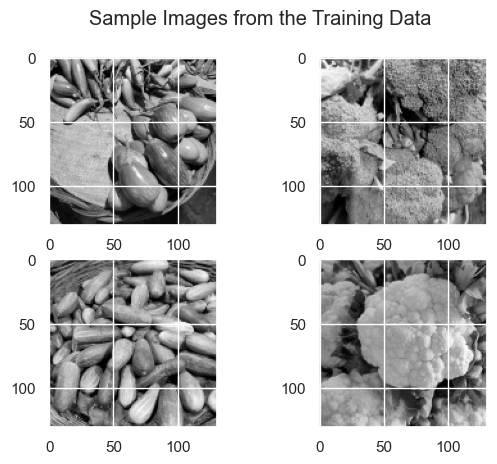

In [21]:
# Plot vegetables instances
# Plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# Show the plot
plt.suptitle('Sample Images from the Training Data')
plt.show()

In this section, we will plot sample images from the training dataset. Specifically, we will display 4 images in grayscale to give us a visual understanding of the data, with a pixel size of 131 by 131

___
# Create & Evaluate Baseline CNN Model
___
Guideline: 
1. Always start by using smaller filters is to collect as much local information as possible, and then gradually increase the filter width to reduce the generated feature space width to represent more global, high-level and representative information
2. Following the principle, the number of channels should be low in the beginning such that it detects low-level features which are combined to form many complex shapes(by increasing the number of channels) which help distinguish between classe

3. General filter sizes used are 3x3, 5x5 and 7x7 for the convolutional layer for a moderate or small-sized images and for Max-Pooling parameters we use 2x2 or 3x3 filter sizes with a stride of 2

In [22]:
# Normalize the data from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)
num_classes = y_test.shape[1]

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 129, 129, 32)      320       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 31, 31, 64)        0         
                                                                 
 flatten_34 (Flatten)        (None, 61504)           

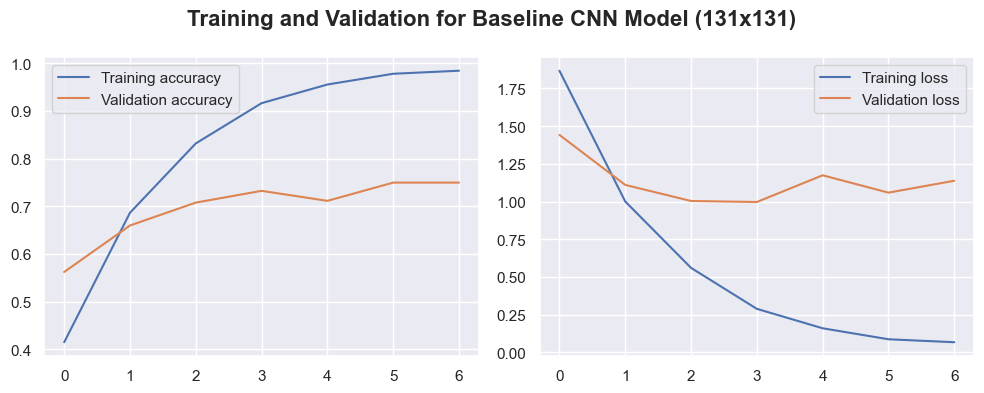

CNN Accuracy: 73.50%
CNN Error: 26.50%


In [23]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)

# Create a Sequential model
base_model_131 = Sequential()

base_model_131.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(131, 131, 1)))
base_model_131.add(MaxPooling2D(pool_size=(2, 2)))
base_model_131.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
base_model_131.add(MaxPooling2D(pool_size=(2, 2)))
base_model_131.add(Dropout(0.2))
base_model_131.add(Flatten())

# Add a fully connected Dense layer
base_model_131.add(Dense(units=128, activation='relu'))
base_model_131.add(Dense(units=15, activation='softmax'))

# Compile the model
base_model_131.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
base_model_131.summary()

# Fit Model
history_base_model_131 = base_model_131.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, callbacks=early_stopping)

# Plot the accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history_base_model_131.history['accuracy'], label='Training accuracy')
ax[0].plot(history_base_model_131.history['val_accuracy'], label='Validation accuracy')
ax[0].legend()
ax[1].plot(history_base_model_131.history['loss'], label='Training loss')
ax[1].plot(history_base_model_131.history['val_loss'], label='Validation loss')
ax[1].legend()
fig.suptitle('Training and Validation for Baseline CNN Model (131x131)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = base_model_131.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the baseline CNN model with only two conv2D layers, we can see that the CNN model for 131 by 131 image data has a relatively low accuracy of about 73% and high CNN error of about 27%, with high overfitting. Thus, I think I need more `conv2D` layers, and perform data augmentation.

Reason: 
1. More convolutional layers can help the model capture more complex and higher-level features. Early layers might capture edges and textures, while deeper layers capture more abstract concepts like shapes and object parts.
2. Solution: Increasing the number of layers can provide the model with the capacity needed to better fit the training data and improve its ability to generalize to new, unseen data.

___
# More Complex CNN Model - Hyperparameter Tuning
___

### Add in more Conv2D layers

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 129, 129, 32)      320       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_71 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 14, 14, 128)    

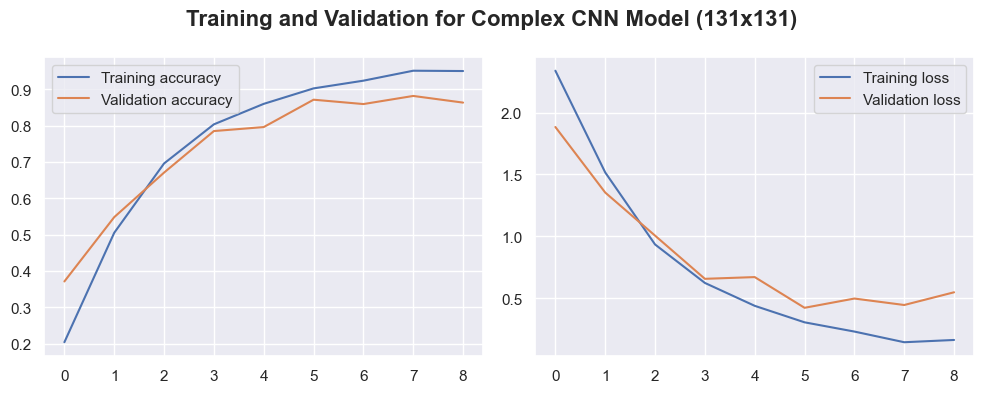

CNN Accuracy: 88.00%
CNN Error: 12.00%


In [24]:
# Create a Sequential model
base_complex_model_131 = Sequential()

base_complex_model_131.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(131, 131, 1)))
base_complex_model_131.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
base_complex_model_131.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
base_complex_model_131.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
base_complex_model_131.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131.add(Dropout(0.2))
base_complex_model_131.add(Flatten())

# Add a fully connected Dense layer
base_complex_model_131.add(Dense(units=256, activation='relu'))
base_complex_model_131.add(Dense(units=128, activation='relu'))
base_complex_model_131.add(Dense(units=15, activation='softmax'))

# Compile the model
base_complex_model_131.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
base_complex_model_131.summary()

# Fit Model
history_base_complex_model_131 = base_complex_model_131.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, callbacks=[early_stopping, res131_best_tuned_model])

# Plot the accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history_base_complex_model_131.history['accuracy'], label='Training accuracy')
ax[0].plot(history_base_complex_model_131.history['val_accuracy'], label='Validation accuracy')
ax[0].legend()
ax[1].plot(history_base_complex_model_131.history['loss'], label='Training loss')
ax[1].plot(history_base_complex_model_131.history['val_loss'], label='Validation loss')
ax[1].legend()
fig.suptitle('Training and Validation for Complex CNN Model (131x131)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = base_complex_model_131.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From our hyperparameter tuning and experimenting, I added 2 more Convolutional-2D layers to the existing two Conv2D layers, so as to make the CNN more complex to capture more image details since our data contains 131 by 131 images, meaning there will be more things to learn from each image. As expected, adding the Conv2D layers increases the CNN model's accuracy from 72% to 90%, and decrease the CNN error from previously 27% to 10%. Furthermore, from the graph, we notice that the overfitting situation has improved, with the accuracy and loss line graph being closer to each other.

### Confusion Matrix Heatmap

1/1 [==============================] - 0s 17ms/step


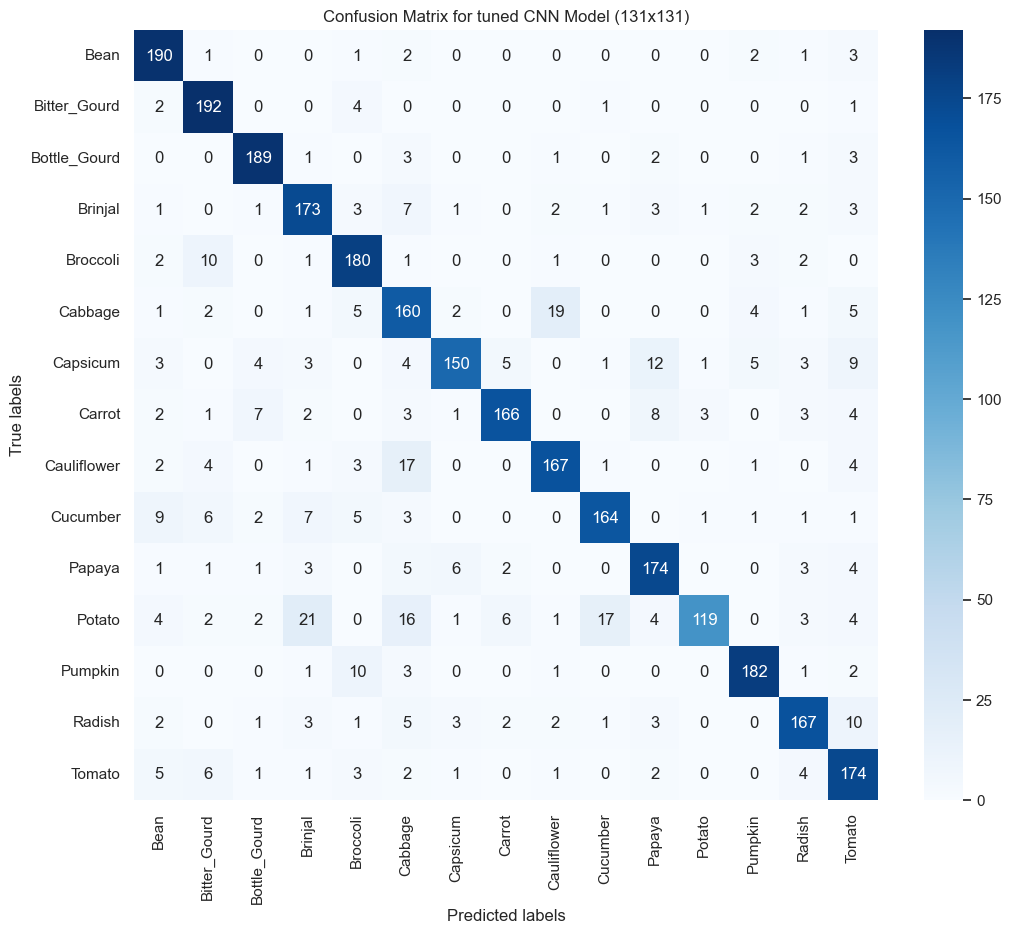

In [25]:
# Path to the test dataset directory
test_dir = './Dataset For Part A/test/'

# Get all subdirectories (which are the class labels)
actual_labels = sorted([d for d in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, d))])

# Collect all test image paths and their corresponding labels
test_image_paths = []
true_labels = []

for label in actual_labels:
    folder_path = os.path.join(test_dir, label)
    for img_name in os.listdir(folder_path):
        if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Add other image formats if needed
            test_image_paths.append(os.path.join(folder_path, img_name))
            true_labels.append(label)

# Assuming 'model' is already loaded and 'class_map' is defined
class_map = {i: label for i, label in enumerate(actual_labels)}  # Create class_map

# Generate predictions for each test image
predicted_labels = []

for image_path in test_image_paths:
    # Load and preprocess the image
    test_img_131 = load_img(image_path, target_size=(131, 131), color_mode='grayscale')
    test_img_arr_131 = img_to_array(test_img_131) / 255.0  # Normalize
    test_img_input_131 = np.expand_dims(test_img_arr_131, axis=0) 

    # Generate the prediction
    prediction = base_complex_model_131.predict(test_img_input_131)
    predicted_label_index = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    predicted_labels.append(class_map[predicted_label_index])

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=actual_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actual_labels, yticklabels=actual_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for tuned CNN Model (131x131)')
plt.show()

To visualize our model result clearer, I plotted a confusion matrix heatmap to see how the model performs. From the output above, we can see that the color depth of the squares through the diagonal are dark, with high numbers in it. This tells us that the model has predicted the correct labels many times when an image is given to it to classify. However, not all models are perfect, for example, the model misclassify potato as brinjal 21 times (number may vary), possibly due to the similar size between both vegetables (results will differ when running it again). In general, this complex CNN model with four Conv2D layers perform quite well.

___
# Model Improvement - Class Weights
___

### Retrain Model with the Class Weights & Evaluate - Reused class weights from above cells

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 129, 129, 32)      320       
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 14, 14, 128)    

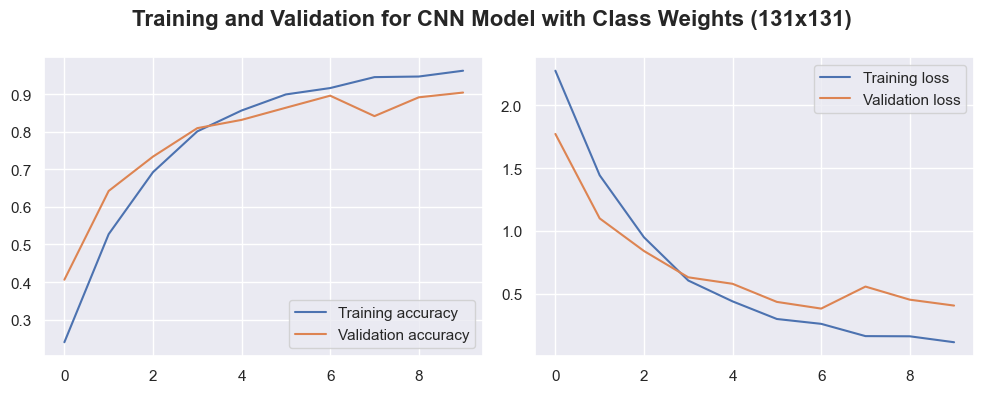

CNN Accuracy: 89.77%
CNN Error: 10.23%


In [26]:
# Create a Sequential model
base_complex_model_131_weights = Sequential()

base_complex_model_131_weights.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(131, 131, 1)))
base_complex_model_131_weights.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131_weights.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
base_complex_model_131_weights.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131_weights.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
base_complex_model_131_weights.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131_weights.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
base_complex_model_131_weights.add(MaxPooling2D(pool_size=(2, 2)))
base_complex_model_131_weights.add(Dropout(0.2))
base_complex_model_131_weights.add(Flatten())

# Add a fully connected Dense layer
base_complex_model_131_weights.add(Dense(units=128, activation='relu'))
base_complex_model_131_weights.add(Dense(units=15, activation='softmax'))

# Compile the model
base_complex_model_131_weights.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
base_complex_model_131_weights.summary()

# Fit Model
history_base_complex_model_131_weights = base_complex_model_131_weights.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, verbose=1, class_weight=class_weights, callbacks=[early_stopping, res131_best_tuned_model])

# Plot the accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].plot(history_base_complex_model_131_weights.history['accuracy'], label='Training accuracy')
ax[0].plot(history_base_complex_model_131_weights.history['val_accuracy'], label='Validation accuracy')
ax[0].legend()
ax[1].plot(history_base_complex_model_131_weights.history['loss'], label='Training loss')
ax[1].plot(history_base_complex_model_131_weights.history['val_loss'], label='Validation loss')
ax[1].legend()
fig.suptitle('Training and Validation for CNN Model with Class Weights (131x131)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = base_complex_model_131_weights.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the above cell, I reused the generated class weights of the classes to retrain the complex CNN model again, to see if there is any improvement after using the class weights. From the accuracy line plot, we can see that the model seem to drop its training and validation accuracy, at 96% and 88% respectively. Using the `.evaluate()` and the X_test and y_test, we see that the CNN accuracy is 89.77% and the CNN error is 10.23. This means that after using the class weights, the model's accuracy has decreased slightly. However, it seems that the overfitting has improved a bit too, with the difference(gap) between the training and validation accuracy has decreased a bit, similarly to training and validation loss too. In conclusion, it seems that despite the slight drop in model accuracy, the overfitting of the model did improve. Next cell, we will perform data augmentation to see if the model can improve more in terms of the accuracy.

___
# Model Improvement - Data Augmentation
___

Found 9043 images belonging to 15 classes.
Epoch 1/50
566/566 [==============================] - 21s 35ms/step - loss: 1.2314 - accuracy: 0.6021 - val_loss: 0.7016 - val_accuracy: 0.7647
Epoch 2/50
566/566 [==============================] - 19s 34ms/step - loss: 0.9003 - accuracy: 0.7084 - val_loss: 0.4956 - val_accuracy: 0.8503
Epoch 3/50
566/566 [==============================] - 20s 35ms/step - loss: 0.7597 - accuracy: 0.7523 - val_loss: 0.3833 - val_accuracy: 0.8800
Epoch 4/50
566/566 [==============================] - 38s 67ms/step - loss: 0.6614 - accuracy: 0.7899 - val_loss: 0.3733 - val_accuracy: 0.8810
Epoch 5/50
566/566 [==============================] - 19s 34ms/step - loss: 0.5932 - accuracy: 0.8085 - val_loss: 0.3376 - val_accuracy: 0.8927
Epoch 6/50
566/566 [==============================] - 19s 34ms/step - loss: 0.5611 - accuracy: 0.8186 - val_loss: 0.3221 - val_accuracy: 0.8963
Epoch 7/50
566/566 [==============================] - 19s 34ms/step - loss: 0.4947 - accuracy

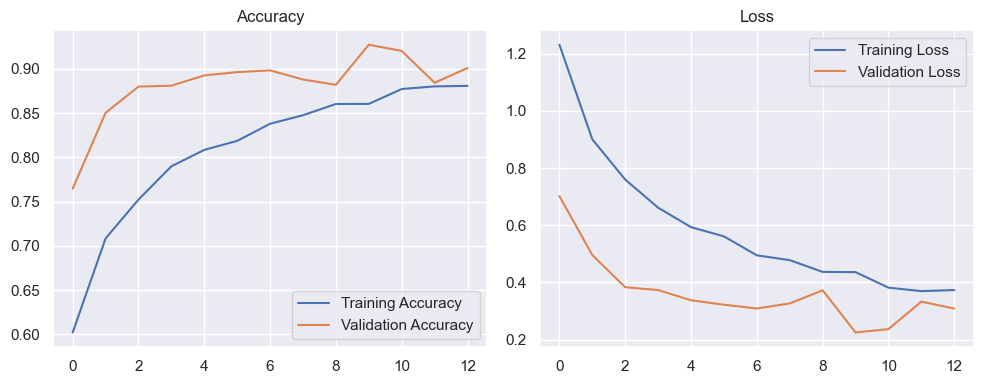

CNN Accuracy: 93.40%
CNN Error: 6.60%


In [27]:
# Define a smaller batch size
batch_size = 16

# Adjust the batch size for the data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    directory='./Dataset For Part A/Train',
    target_size=(131, 131),  # Resize images to a smaller resolution if needed
    batch_size=batch_size,   # Use a smaller batch size
    class_mode='categorical',
    color_mode='grayscale')

# Apply normalization and augmentation on-the-fly
train_augmented_data = train_generator

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model with early stopping
history = base_complex_model_131_weights.fit(train_augmented_data, validation_data=(X_val, y_val), 
                           epochs=50, verbose=1, callbacks=[early_stopping])

# Final evaluation of the model
scores = base_complex_model_131.evaluate(X_test, y_test, verbose=0)
print("CNN Model Accuracy: {:.2f}%".format(scores[1]*100))

# Plot training and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
fig.suptitle('Training and Validation for CNN Model with Data Augmentation (131x131)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Final evaluation of the model
scores = base_complex_model_131_weights.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))
print("CNN Error: %.2f%%" % (100-scores[1]*100))

From the cell above, I have performed data augmentation on my 131 by 131 image data, and from the results, we can say that CNN model has improved. The CNN accuracy has increase to 91% and the CNN error has dropped to 8%, meaning the model has become more effective at correctly classifying the images and its overall performance has significantly improved.

___
# Final Best CNN Model - 131 by 131 pixel
___

In [28]:
# Load the model
res131_best_tuned_model = load_model('res131_best_tuned_model.h5')
print("Loaded res131_best_tuned_model successfully")

# Save the model weights
res131_best_tuned_model.save_weights('res131_best_tuned_model_weights.h5')
print("Saved res131_best_tuned_model weights successfully")

Loaded res131_best_tuned_model successfully
Saved res131_best_tuned_model weights successfully


___
# Analysis & Conclusion
___

In conclusion, I have created the best CNN model for the two dataset, 37x37 and 131x131 images. For the 37x37 CNN Model, it has a CNN accuracy of about 85.63% and a CNN Error of about 14.37%. As for the 131x131 CNN Model, it has a CNN accuracy of about 90.07% and a CNN Error of about 9.93%. Comparing the two models based on accuracy and error only, it seems that the 131x131 CNN Model performs better in classifying the images to their actual labels than the 37x37 CNN Model due to higher accuracy and lower error. Other than accuracy and error, we need to see which model has a higher overfitting.

### `37x37 CNN Best Model:`

![Local Image](./OutputImages/PartA/line_graph_res37bestmodel.png)

### `131x131 CNN Best Model:`

![Local Image](./OutputImages/PartA/line_graph_res131bestmodel.png)

From the two line graphs of the two models, we notice that both models have slight overfitting, and both models seem to have a similar degree of overfitting. However, I do also notice that the line graph for 131x131 model has lesser fluctuations as compared to 37x37 model, due to presence of sharp edges and angles in the 37x37 model's line graph. It might indicate that 131x131 model trains better than 37x37 with lesser variation in accuracy and loss, perhaps due to large data for 131x131 model to learn. Next, I will talk heatmap of both models and compare them.

### `Confusion Matrix Map`

<div style="display: flex;">
    <img src="./OutputImages/PartA/confusion_matrix_heatmap_res37.png" alt="Image 1" style="width: 50%;">
    <img src="./OutputImages/PartA/confusion_matrix_heatmap_res131.png" alt="Image 2" style="width: 50%;">
</div>

From the heatmap, we notice that both confusion matrix has predicted most of the images correctly, as seen from the diagonal squares on both matrixes. However, I do see that there are more 'darker' blues on the diagonal squares for the 131x131 CNN Model, meaning that the 131x131 CNN Model predicted more images correctly than 37x37. Other than that, both models are great in the image classification, though there are slight faint blue colors in the confusion matrix, suggesting that both models have classified some images incorrectly, giving them wrong class labels.

### `Data Augmentation`

I have chosen to do data augmentation on my data. The question is, why do we need to augment our data? This is because Data augmentation is a crucial technique in machine learning for increasing the size and diversity of training datasets by creating modified versions of existing data. This process helps improve model generalization, preventing overfitting by exposing the model to varied data, thus enhancing its robustness to handle real-world variations. It is especially beneficial in scenarios with limited datasets, as it synthetically increases the dataset size, enabling the training of more complex models without the need for additional manual labeling. Data augmentation introduces essential variability, simulating different real-world conditions through techniques like rotation, scaling, cropping, and adding noise. Moreover, it addresses class imbalance by generating more examples of underrepresented classes, leading to improved model performance across all categories.

`37x37 CNN Model - Data Augmentation`:

![Local Image](./OutputImages/PartA/data_augmentation_res37.png)

`131x131 CNN Model - Data Augmentation`:

![Local Image](./OutputImages/PartA/data_augmentation_res131.png)

From the two line graph, we can see that the data augmentation makes the 37x37 model perform poorly, perhaps due to the images being in small resolution, which worsen due to zooming, scalling, rotating, adding more noise to the pictures during data augmentation. However, we notice that for 131x131 model, it performs better, with an increased in accuracy from 90% to 93% and decreased in CNN error from 9% to 6.6%, meaning that the model is able to classify the image better. So to sum up, doing data augmentation is actually beneficial to images that have a high resolution, in our case 131x131, as it does not distort or make the images hard to be used to train. As for low-resolution image size like 37x37, they contain fewer pixels, which means less detail and information about the features of the objects within the images. This limitation reduces the effectiveness of augmentation techniques like rotation, scaling, and flipping because even small augmentations can drastically alter the appearance of the image, potentially making it unrecognizable or losing important features. Therefore, to answer the question whether doing data augmentation is useful, the answer is that it should only be done on datasets with large image size only. 

Still, it does not mean we cannot improve CNN Model using the 37x37 image. Unlike data augmentation, we can use class weights, which do not require generating additional data or modifying existing samples, making them particularly suitable for scenarios where data augmentation might not be feasible or effective, such as with low-resolution images. By generating different class weights based on the number of images in each class, we can fit this class weights to our model during training, so that the model will not be biased towards classes with larger amount of images.

`Before Implementing Class Weights - 37x37 Model`:

![Local Image](./OutputImages/PartA/res31model_before_class_weights.png)

`After Implementing Class Weights - 37x37 Model`:

![Local Image](./OutputImages/PartA/res31model_after_class_weights.png)

The line graphs of CNN Model before and after implementing class weights does not show much differences iat first glance, but we can see that the line graph of the validation accuracy and loss is closer to the training accuracy and loss between 10 and 12 epochs, as compared to before using class weights. This means there is a very small improvement in the overfitting situation.  

___
# End Of Report
___